In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
df = pd.concat(
    [
        pd.read_csv("resources/round4/prices_round_4_day_1.csv", sep=';'),
        pd.read_csv("resources/round4/prices_round_4_day_2.csv", sep=';'),
        pd.read_csv("resources/round4/prices_round_4_day_3.csv", sep=';'),
        pd.read_csv("resources/round4/prices_round_4_day_4.csv", sep=';'),
    ],
    ignore_index=True
)

# With COCONUT price at $10000, COCONUT_COUPON price is $637.37
# COCONUT to COCONUT_COUPON ratio is 15.6894739319

<Axes: xlabel='day,timestamp'>

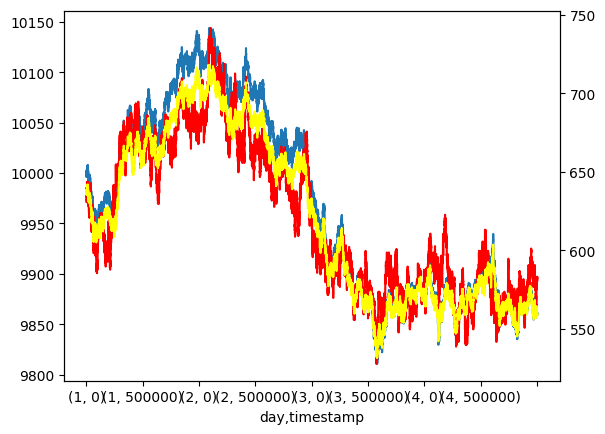

In [7]:
mid_price_df = df.pivot(index=['day', 'timestamp'], columns='product', values='mid_price')

mid_price_df['COCONUT_DIFF'] = mid_price_df['COCONUT'] - 10000
mid_price_df['EXPECTED_COCONUT_COUPON'] = (mid_price_df['COCONUT_DIFF'] * .56) + 637.37

price_factor = 15.6894739319 # (mid_price_df['COCONUT'] / mid_price_df['COCONUT_COUPON']).mean()
mid_price_df['COCONUT_PRICE_FACTOR'] = mid_price_df['COCONUT'] / price_factor

# window_size = 30000
# mid_price_df['COCONUT_VOL'] = mid_price_df['COCONUT'].pct_change().rolling(window_size, min_periods=1000).std()

fig, ax1 = plt.subplots()
mid_price_df['COCONUT'].plot(ax=ax1)

ax2 = ax1.twinx()
mid_price_df['COCONUT_COUPON'].plot(ax=ax2, color='red')
mid_price_df['EXPECTED_COCONUT_COUPON'].plot(ax=ax2, color='yellow')
# mid_price_df['COCONUT_PRICE_FACTOR'].plot(ax=ax2, color='orange')

# ax3 = ax1.twinx()
# mid_price_df['COCONUT_VOL'].plot(ax=ax3, color='green')




In [8]:
coconut_max = mid_price_df["COCONUT"].max()
coconut_min = mid_price_df["COCONUT"].min()
coconut_mean = mid_price_df["COCONUT"].mean()
coconut_std = mid_price_df["COCONUT"].std()

coconut_coupon_max = mid_price_df["COCONUT_COUPON"].max()
coconut_coupon_min = mid_price_df["COCONUT_COUPON"].min()
coconut_coupon_mean = mid_price_df["COCONUT_COUPON"].mean()
coconut_coupon_std = mid_price_df["COCONUT_COUPON"].std()

print(f"COCONUT max: {coconut_max}, min: {coconut_min}, mean: {coconut_mean}, std: {coconut_std}")
print(f"COCONUT_COUPON max: {coconut_coupon_max}, min: {coconut_coupon_min}, mean: {coconut_coupon_mean}, std: {coconut_coupon_std}")

print(f"range: {(coconut_max - coconut_min)/(coconut_coupon_max - coconut_coupon_min)}")

mid_price_df.corr()

COCONUT max: 10144.0, min: 9810.5, mean: 9969.002125, std: 94.10140439888302
COCONUT_COUPON max: 741.5, min: 527.5, mean: 620.2014, std: 48.49657821426644
range: 1.558411214953271


product,AMETHYSTS,CHOCOLATE,COCONUT,COCONUT_COUPON,GIFT_BASKET,ORCHIDS,ROSES,STARFRUIT,STRAWBERRIES,COCONUT_DIFF,EXPECTED_COCONUT_COUPON,COCONUT_PRICE_FACTOR
product,,,,,,,,,,,,
AMETHYSTS,1.000000,-0.001029,0.004989,0.003771,-0.003442,0.005898,-0.004829,0.003863,0.003598,0.004989,0.004989,0.004989
CHOCOLATE,-0.001029,1.000000,-0.197899,-0.240508,0.953547,0.403149,0.268724,-0.822793,0.288154,-0.197899,-0.197899,-0.197899
COCONUT,0.004989,-0.197899,1.000000,0.960185,-0.148700,0.017414,-0.426811,0.117755,0.245126,1.000000,1.000000,1.000000
COCONUT_COUPON,0.003771,-0.240508,0.960185,1.000000,-0.167511,-0.172437,0.109241,0.370442,-0.246130,0.960185,0.960185,0.960185
GIFT_BASKET,-0.003442,0.953547,-0.148700,-0.167511,1.000000,0.340453,0.288276,-0.742980,0.318800,-0.148700,-0.148700,-0.148700
ORCHIDS,0.005898,0.403149,0.017414,-0.172437,0.340453,1.000000,-0.367692,-0.439579,0.657280,0.017414,0.017414,0.017414
ROSES,-0.004829,0.268724,-0.426811,0.109241,0.288276,-0.367692,1.000000,-0.048984,-0.716897,-0.426811,-0.426811,-0.426811
STARFRUIT,0.003863,-0.822793,0.117755,0.370442,-0.742980,-0.439579,-0.048984,1.000000,-0.443006,0.117755,0.117755,0.117755
STRAWBERRIES,0.003598,0.288154,0.245126,-0.246130,0.318800,0.657280,-0.716897,-0.443006,1.000000,0.245126,0.245126,0.245126


In [9]:
from scipy.stats import norm
import numpy as np
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho
def delta_calc(r, S, K, T, sigma, type="c"):

    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc, delta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")



In [10]:
delta_calc(0, 9900, 10000, 0.984, 0.16)


(0.5063964429132697, 0.5063964429132697)

In [11]:
def d1(S, K, t, r, sigma):  # see Hull, page 292
    """Calculate the d1 component of the Black-Scholes PDE.

    :param S: underlying asset price
    :type S: float
    :param K: strike price
    :type K: float
    :param sigma: annualized standard deviation, or volatility
    :type sigma: float
    :param t: time to expiration in years
    :type t: float
    :param r: risk-free interest rate
    :type r: float

    John C. Hull, "Options, Futures and Other Derivatives,"
    7th edition, Example 13.6, page 294

    >>> S = 42
    >>> K = 40
    >>> r = .10
    >>> sigma = .20
    >>> t = 0.5
    >>> calculated_d1 = d1(S,K,t,r,sigma)
    >>> text_book_d1 = 0.7693
    >>> abs(calculated_d1 - text_book_d1) < 0.0001
    True
    """

    sigma_squared = sigma * sigma
    numerator = np.log(S / float(K)) + (r + sigma_squared / 2.) * t
    denominator = sigma * np.sqrt(t)

    if not denominator:
        print ('')
    return numerator / denominator

In [12]:
from math import fabs, sqrt, exp

def norm_pdf(x):
    return ONE_OVER_SQRT_TWO_PI * exp(-.5 * x * x)

norm_cdf_asymptotic_expansion_first_threshold = -10.0
norm_cdf_asymptotic_expansion_second_threshold = -1 / sqrt(DBL_EPSILON)
def norm_cdf(z):
    if z <= norm_cdf_asymptotic_expansion_first_threshold:
        # Asymptotic expansion for very negative z following (26.2.12) on page 408
        # in M. Abramowitz and A. Stegun, Pocketbook of Mathematical Functions, ISBN 3-87144818-4.
        sum = 1
        if z >= norm_cdf_asymptotic_expansion_second_threshold:
            zsqr = z * z
            i = 1
            g = 1
            x = 0
            y = 0
            a = DBL_MAX

            lasta = a
            x = (4 * i - 3) / zsqr
            y = x * ((4 * i - 1) / zsqr)
            a = g * (x - y)
            sum -= a
            g *= y
            i += 1
            a = fabs(a)
            while lasta > a >= fabs(sum * DBL_EPSILON):
                lasta = a
                x = (4 * i - 3) / zsqr
                y = x * ((4 * i - 1) / zsqr)
                a = g * (x - y)
                sum -= a
                g *= y
                i += 1
                a = fabs(a)
        return -norm_pdf(z) * sum / z
    return 0.5 * erfc_cody(-z * ONE_OVER_SQRT_TWO)

NameError: name 'DBL_EPSILON' is not defined

In [ ]:
def delta(flag, S, K, t, r, sigma):
    """Return Black-Scholes delta of an option.
    
    :param S: underlying asset price
    :type S: float
    :param K: strike price
    :type K: float
    :param sigma: annualized standard deviation, or volatility
    :type sigma: float
    :param t: time to expiration in years
    :type t: float
    :param r: risk-free interest rate
    :type r: float
    :param flag: 'c' or 'p' for call or put.
    :type flag: str      

    Example 17.1, page 355, Hull:
    
    >>> S = 49
    >>> K = 50 
    >>> r = .05
    >>> t = 0.3846
    >>> sigma = 0.2
    >>> flag = 'c'
    >>> delta_calc = delta(flag, S, K, t, r, sigma)
    >>> # 0.521601633972
    >>> delta_text_book = 0.522
    >>> abs(delta_calc - delta_text_book) < .01
    True
    """

    d_1 = d1(S, K, t, r, sigma)

    if flag == 'p':
        return N(d_1) - 1.0
    else:
        return N(d_1)

364.91964
79.50251684867659
0        355.000000
1        350.749996
2        348.999994
3        347.624991
4        345.899986
            ...    
49995    364.550150
49996    364.550180
49997    364.550242
49998    364.550451
49999    364.550702
Name: GIFT_BASKET_PREMIUM, Length: 50000, dtype: float64


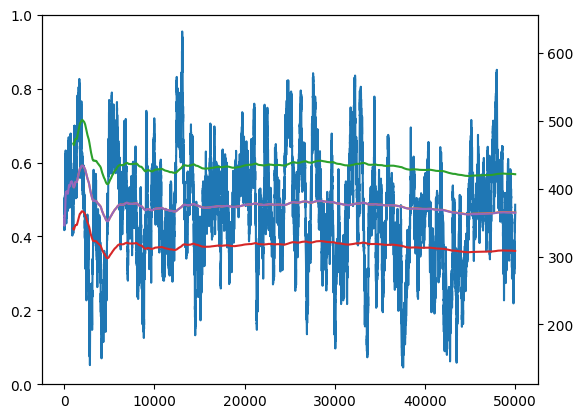

In [22]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.concat(
    [
        pd.read_csv("resources/round3/prices_round_3_day_0.csv", sep=";"),
        pd.read_csv("resources/round3/prices_round_3_day_1.csv", sep=";"),
        pd.read_csv("resources/round3/prices_round_3_day_2.csv", sep=";"),
        pd.read_csv("resources/round3/prices_round_3_day_3.csv", sep=";"),
        pd.read_csv("resources/round4/prices_round_4_day_4.csv", sep=";"),
    ],
    ignore_index=True,
)
# df = df[df["timestamp"] < 100000]

df = df.pivot(index=["day", "timestamp"], columns="product", values="mid_price").reset_index()
df["GIFT_BASKET_PREMIUM"] = df["GIFT_BASKET"] - (df["ROSES"] + df["CHOCOLATE"] * 4 + df["STRAWBERRIES"] * 6)
print(df["GIFT_BASKET_PREMIUM"].mean())
print(df["GIFT_BASKET_PREMIUM"].std())
print(df["GIFT_BASKET_PREMIUM"].ewm(span=1000000).mean())
df["GIFT_BASKET_PREMIUM_MEAN"] = df["GIFT_BASKET_PREMIUM"].rolling(window=100000, min_periods=1000).mean()
df["GIFT_BASKET_RUNNING_MEAN"] = df["GIFT_BASKET_PREMIUM"].rolling(window=10000, min_periods=100).mean()
df["GIFT_BASKET_EXP_MEAN"] = df["GIFT_BASKET_PREMIUM"].ewm(span=1000000).mean()
df["GIFT_BASKET_PREMIUM_STD"] = df["GIFT_BASKET_PREMIUM"].rolling(window=10000, min_periods=100).std()
df["MEAN_HIGHER_THRESHOLD"] = df["GIFT_BASKET_PREMIUM_MEAN"] * 1.155
df["MEAN_LOWER_THRESHOLD"] = df["GIFT_BASKET_PREMIUM_MEAN"] * 0.845
df["RUNNING_MEAN_HIGHER_THRESHOLD"] = df["GIFT_BASKET_RUNNING_MEAN"] * 1.1
df["RUNNING_MEAN_LOWER_THRESHOLD"] = df["GIFT_BASKET_RUNNING_MEAN"] * 0.9
df["370"] = 370

df["STD_HIGHER_THRESHOLD"] = df["GIFT_BASKET_RUNNING_MEAN"] + df["GIFT_BASKET_PREMIUM_STD"]
df["STD_LOWER_THRESHOLD"] = df["GIFT_BASKET_RUNNING_MEAN"] - df["GIFT_BASKET_PREMIUM_STD"]
df["HALF_STD_HIGHER_THRESHOLD"] = df["GIFT_BASKET_RUNNING_MEAN"] + df["GIFT_BASKET_PREMIUM_STD"] / 2
df["HALF_STD_LOWER_THRESHOLD"] = df["GIFT_BASKET_RUNNING_MEAN"] - df["GIFT_BASKET_PREMIUM_STD"] / 2
df["TWO_STD_HIGHER_THRESHOLD"] = df["GIFT_BASKET_RUNNING_MEAN"] + df["GIFT_BASKET_PREMIUM_STD"] * 2
df["TWO_STD_LOWER_THRESHOLD"] = df["GIFT_BASKET_RUNNING_MEAN"] - df["GIFT_BASKET_PREMIUM_STD"] * 2

fig, ax1 = plt.subplots()
# ax1.plot(df["GIFT_BASKET_PREMIUM_STD"], label="GIFT_BASKET_PREMIUM_STD", color="red")

ax2 = ax1.twinx()
ax2.plot(
    df[
        [
            "GIFT_BASKET_PREMIUM",
            "GIFT_BASKET_PREMIUM_MEAN",
            "MEAN_HIGHER_THRESHOLD",
            "MEAN_LOWER_THRESHOLD",
            # "GIFT_BASKET_RUNNING_MEAN",
            # "RUNNING_MEAN_HIGHER_THRESHOLD",
            # "RUNNING_MEAN_LOWER_THRESHOLD",
            # "STD_HIGHER_THRESHOLD",
            # "STD_LOWER_THRESHOLD",
            # "HALF_STD_HIGHER_THRESHOLD",
            # "HALF_STD_LOWER_THRESHOLD",
            # "TWO_STD_HIGHER_THRESHOLD",
            # "TWO_STD_LOWER_THRESHOLD",
            "GIFT_BASKET_EXP_MEAN",
            # "370",
        ]
    ],
    label="GIFT_BASKET_PREMIUM",
)

In [ ]:
import statsmodels.tsa.stattools as ts

adf = ts.adfuller(df["GIFT_BASKET_PREMIUM"], 1)
print(adf)

(-7.269794687270672, 1.5994950178130506e-10, 1, 39998, {'1%': -3.430513501168074, '5%': -2.8616122637601964, '10%': -2.5668084636788966}, 259614.02219749652)


In [ ]:
from scipy.stats import normaltest, kstest

stat,p = normaltest(df["GIFT_BASKET_PREMIUM"])
print(stat, p)

97.35668534885207 7.232099428773071e-22


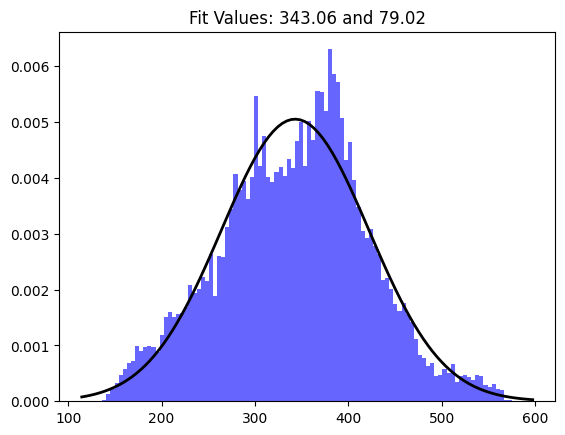

In [20]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# df["GIFT_BASKET_PREMIUM"].hist(bins=100)
 
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(df["GIFT_BASKET_PREMIUM"]) 
 
# Plot the histogram.
plt.hist(df["GIFT_BASKET_PREMIUM"], bins=100, density=True, alpha=0.6, color='b')
 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
 
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
 
plt.show()

In [ ]:
import scipy.stats as st

def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))


print(get_best_distribution(df["GIFT_BASKET_PREMIUM"]))

p value for norm = 3.624899972951641e-05


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 3.9537405383227424e-13
p value for pareto = 0.0
p value for genextreme = 3.710612399647347e-13
Best fitting distribution: norm
Best p value: 3.624899972951641e-05
Parameters for the best fit: (370.2881375, 79.39983419712597)
None


In [ ]:
from scipy.stats import shapiro

stat, p = normaltest(df["GIFT_BASKET_PREMIUM"])
print(stat, p)
alpha = 0.05

if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

97.35668534885207 7.232099428773071e-22
Sample does not look Gaussian (reject H0)
